In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('/content/drive/MyDrive/BA/dataset/Resume/Resume.csv')


In [24]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


# EDA

In [25]:
df.shape

(2484, 4)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [27]:
df.isnull().sum()

,0
ID,0
Resume_str,0
Resume_html,0
Category,0


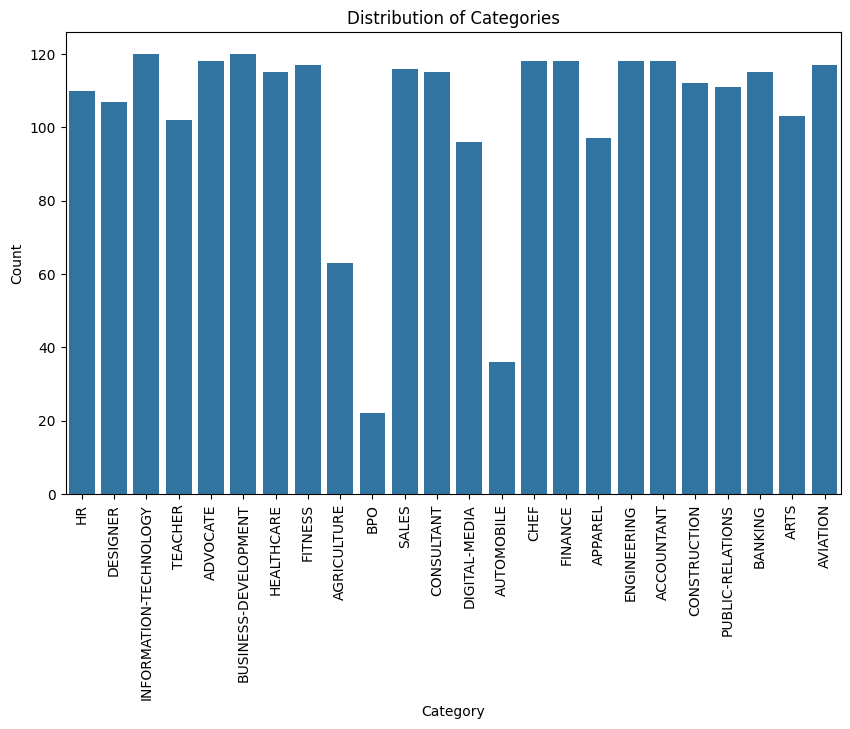

In [28]:
category_counts = df['Category'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [29]:
unique_categories = df['Category'].unique()
print(unique_categories)


['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'
 'ARTS' 'AVIATION']


In [30]:
num_unique_categories = df['Category'].nunique()
print(f"Number of unique categories: {num_unique_categories}")


Number of unique categories: 24


In [31]:
df = df.drop(['ID', 'Resume_html'], axis=1)

# Preprocessing

In [32]:
import re

def preprocess_text(text):
  text = text.lower()  # Convert to lowercase
  text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
  text = text.strip()  # Remove leading/trailing whitespace
  return text

df['Resume_str'] = df['Resume_str'].apply(preprocess_text)

In [33]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')


def further_preprocess_text(text):
  tokens = text.split()
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  stemmer = PorterStemmer()
  tokens = [stemmer.stem(word) for word in tokens]
  processed_text = " ".join(tokens)
  return processed_text

df['Resume_str'] = df['Resume_str'].apply(further_preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
df.head()

,Resume_str,Category
0,hr administratormarket associ hr administr sum...,HR
1,hr specialist u hr oper summari versatil mediu...,HR
2,hr director summari 20 year experi recruit 15 ...,HR
3,hr specialist summari dedic driven dynam 20 ye...,HR
4,hr manag skill highlight hr skill hr depart st...,HR


In [35]:
def remove_numbers(text):
  """Removes numbers from the text."""
  text = re.sub(r"\d+", "", text)
  return text


df['Resume_str'] = df['Resume_str'].apply(remove_numbers)

df.head()

,Resume_str,Category
0,hr administratormarket associ hr administr sum...,HR
1,hr specialist u hr oper summari versatil mediu...,HR
2,hr director summari year experi recruit plu ...,HR
3,hr specialist summari dedic driven dynam year...,HR
4,hr manag skill highlight hr skill hr depart st...,HR


In [36]:

df.to_csv('/content/drive/MyDrive/BA/dataset/Resume/preprocessed_Resume.csv', index=False)


# Traditional ML Models

In [37]:


from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


encoder.fit(df['Category'])


df['Category_encoded'] = encoder.transform(df['Category'])

df.head()


,Resume_str,Category,Category_encoded
0,hr administratormarket associ hr administr sum...,HR,19
1,hr specialist u hr oper summari versatil mediu...,HR,19
2,hr director summari year experi recruit plu ...,HR,19
3,hr specialist summari dedic driven dynam year...,HR,19
4,hr manag skill highlight hr skill hr depart st...,HR,19


In [58]:
# prompt: save the encoder

import pickle

# Save the encoder to a file
filename = '/content/drive/MyDrive/BA/dataset/Resume/label_encoder.pkl'
pickle.dump(encoder, open(filename, 'wb'))


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
vectorizer.fit(df['Resume_str'])

tfidf_matrix = vectorizer.transform(df['Resume_str'])

tfidf_matrix.shape

(2484, 5000)

In [39]:
# prompt: save the vectorizer

import pickle

# Save the vectorizer to a file
filename = '/content/drive/MyDrive/BA/dataset/Resume/tfidf_vectorizer.pkl'
pickle.dump(vectorizer, open(filename, 'wb'))


In [40]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix, df['Category_encoded'], test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42
)

In [41]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1490, 5000)
X_val shape: (497, 5000)
X_test shape: (497, 5000)
y_train shape: (1490,)
y_val shape: (497,)
y_test shape: (497,)


Training Logistic Regression...

Logistic Regression Evaluation:
Validation Accuracy: 0.6599597585513078
Test Accuracy: 0.6277665995975855
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.53      0.53      0.53        30
           2       1.00      0.12      0.22         8
           3       0.50      0.35      0.41        20
           4       0.24      0.22      0.23        18
           5       0.50      0.17      0.25         6
           6       0.67      0.86      0.75        21
           7       0.79      0.65      0.71        23
           8       0.00      0.00      0.00         2
           9       0.74      0.52      0.61        27
          10       0.85      0.71      0.77        24
          11       0.89      0.71      0.79        34
          12       0.55      0.30      0.39        20
          13       0.73      0.84      0.78        19
          14       0.84   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


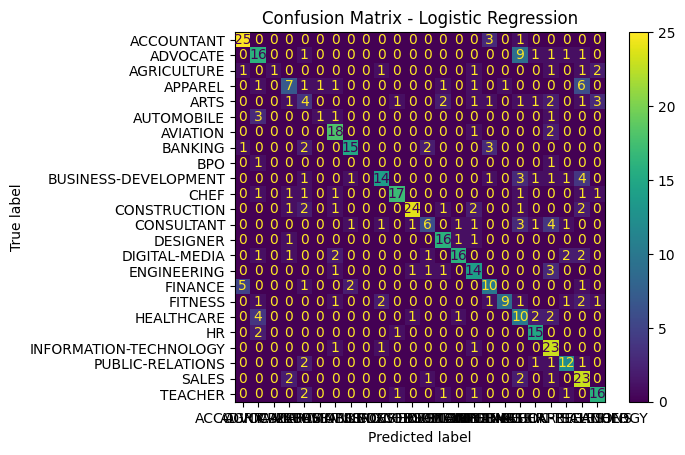

Model saved as /content/drive/MyDrive/BA/dataset/Resume/Logistic Regression.sav
------------------------------------
Training Support Vector Machine...

Support Vector Machine Evaluation:
Validation Accuracy: 0.641851106639839
Test Accuracy: 0.5814889336016097
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.76        29
           1       0.57      0.53      0.55        30
           2       1.00      0.12      0.22         8
           3       0.46      0.30      0.36        20
           4       0.14      0.22      0.17        18
           5       0.50      0.17      0.25         6
           6       0.57      0.81      0.67        21
           7       0.82      0.61      0.70        23
           8       0.00      0.00      0.00         2
           9       0.68      0.48      0.57        27
          10       0.88      0.62      0.73        24
          11       0.95      0.62      0.75        34
          12

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


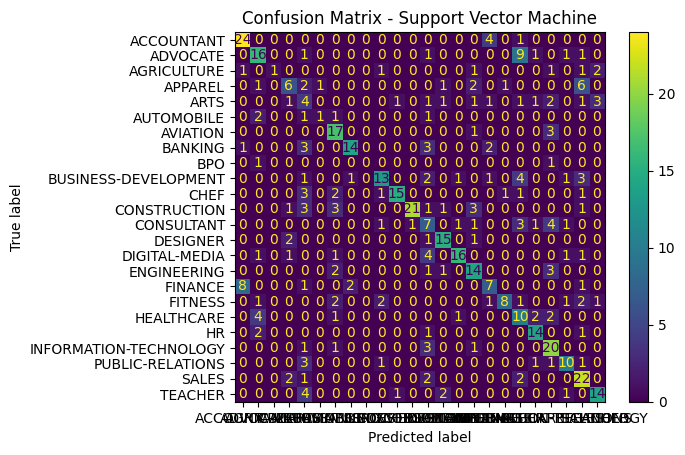

Model saved as /content/drive/MyDrive/BA/dataset/Resume/Support Vector Machine.sav
------------------------------------
Training Naive Bayes...

Naive Bayes Evaluation:
Validation Accuracy: 0.5573440643863179
Test Accuracy: 0.5352112676056338
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.75      0.30      0.43        30
           2       1.00      0.12      0.22         8
           3       0.86      0.30      0.44        20
           4       0.22      0.11      0.15        18
           5       0.00      0.00      0.00         6
           6       0.57      0.76      0.65        21
           7       0.90      0.39      0.55        23
           8       0.00      0.00      0.00         2
           9       0.41      0.67      0.51        27
          10       0.89      0.71      0.79        24
          11       0.95      0.56      0.70        34
          12       1.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


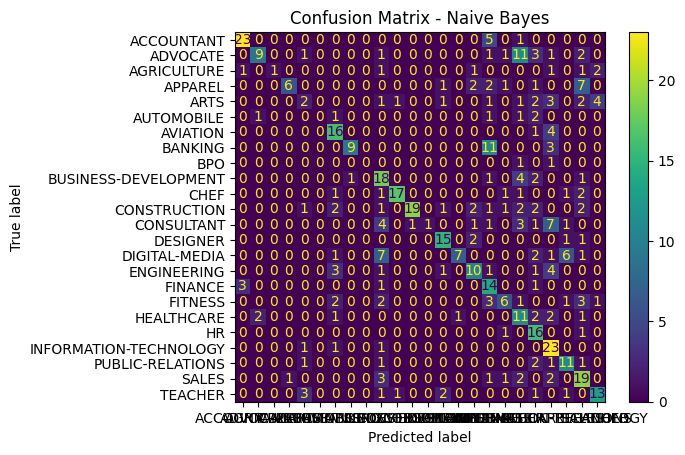

Model saved as /content/drive/MyDrive/BA/dataset/Resume/Naive Bayes.sav
------------------------------------
Training Decision Tree...

Decision Tree Evaluation:
Validation Accuracy: 0.5150905432595574
Test Accuracy: 0.4909456740442656
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.59      0.63        29
           1       0.82      0.60      0.69        30
           2       0.06      0.12      0.08         8
           3       0.23      0.30      0.26        20
           4       0.32      0.33      0.32        18
           5       0.00      0.00      0.00         6
           6       0.61      0.81      0.69        21
           7       0.40      0.35      0.37        23
           8       0.00      0.00      0.00         2
           9       0.53      0.37      0.43        27
          10       0.83      0.62      0.71        24
          11       0.73      0.56      0.63        34
          12       0.18      0.20    

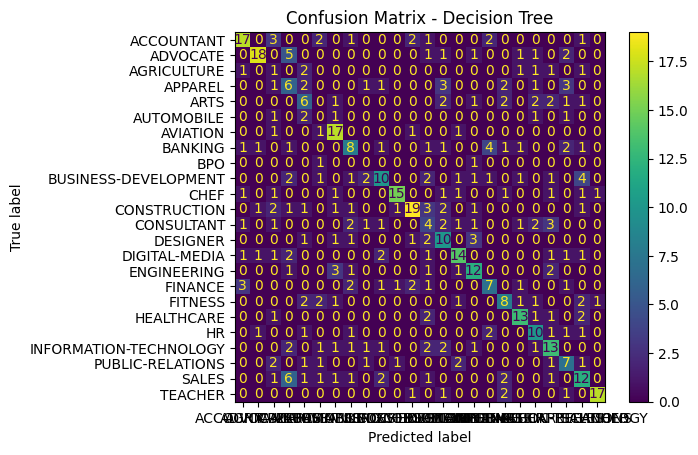

Model saved as /content/drive/MyDrive/BA/dataset/Resume/Decision Tree.sav
------------------------------------


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
  print(f"Training {model_name}...")
  model.fit(X_train, y_train)

  # Predict on the validation set
  y_pred_val = model.predict(X_val)

  # Predict on the test set
  y_pred_test = model.predict(X_test)

  # Evaluate the model
  print(f"\n{model_name} Evaluation:")
  print(f"Validation Accuracy: {accuracy_score(y_val, y_pred_val)}")
  print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test)}")
  print("Classification Report:\n", classification_report(y_test, y_pred_test))

  # Confusion Matrix
  cm = confusion_matrix(y_test, y_pred_test)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
  disp.plot()
  plt.title(f'Confusion Matrix - {model_name}')
  plt.show()

 # Save the model
  import pickle
  filename = f"/content/drive/MyDrive/BA/dataset/Resume/{model_name}.sav"
  pickle.dump(model, open(filename, 'wb'))
  print(f"Model saved as {filename}")
  print("------------------------------------")

Training Multi-layer Perceptron...

Multi-layer Perceptron Evaluation:
Validation Accuracy: 0.635814889336016
Test Accuracy: 0.5814889336016097
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78        29
           1       0.53      0.53      0.53        30
           2       0.25      0.12      0.17         8
           3       0.44      0.40      0.42        20
           4       0.29      0.22      0.25        18
           5       0.50      0.33      0.40         6
           6       0.64      0.86      0.73        21
           7       0.75      0.52      0.62        23
           8       0.25      0.50      0.33         2
           9       0.52      0.44      0.48        27
          10       0.89      0.67      0.76        24
          11       0.85      0.68      0.75        34
          12       0.26      0.30      0.28        20
          13       0.58      0.79      0.67        19
          14       0.

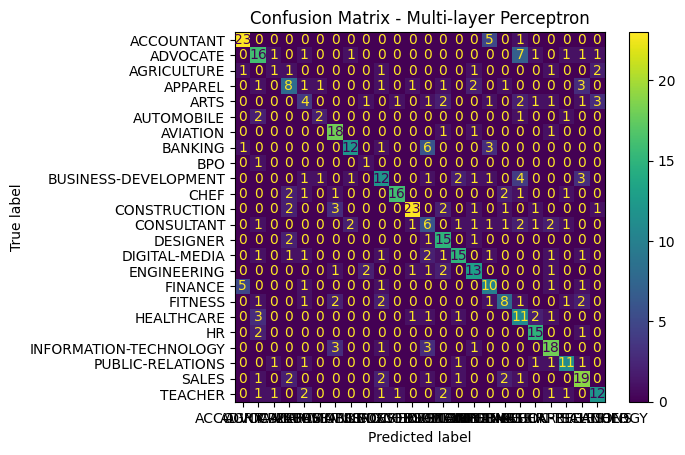

In [43]:
from sklearn.neural_network import MLPClassifier

# Define the Multi-layer Perceptron model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
print("Training Multi-layer Perceptron...")
mlp_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = mlp_model.predict(X_val)

# Predict on the test set
y_pred_test = mlp_model.predict(X_test)

# Evaluate the model
print("\nMulti-layer Perceptron Evaluation:")
print(f"Validation Accuracy: {accuracy_score(y_val, y_pred_val)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test)}")
print("Classification Report:\n", classification_report(y_test, y_pred_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot()
plt.title('Confusion Matrix - Multi-layer Perceptron')
plt.show()


In [44]:
import pickle

# Save the model to a file
filename = 'mlp.sav'
pickle.dump(models['Logistic Regression'], open(filename, 'wb'))


# DL models

In [45]:
df = pd.read_csv('/content/drive/MyDrive/BA/dataset/Resume/preprocessed_Resume.csv')
df.head()

,Resume_str,Category
0,hr administratormarket associ hr administr sum...,HR
1,hr specialist u hr oper summari versatil mediu...,HR
2,hr director summari year experi recruit plu ...,HR
3,hr specialist summari dedic driven dynam year...,HR
4,hr manag skill highlight hr skill hr depart st...,HR


In [46]:
from sklearn.preprocessing import LabelEncoder


In [47]:
# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the encoder to the 'Category' column
encoder.fit(df['Category'])

# Transform the 'Category' column into encoded values
df['Category_encoded'] = encoder.transform(df['Category'])

# Display the updated DataFrame
df.head()


,Resume_str,Category,Category_encoded
0,hr administratormarket associ hr administr sum...,HR,19
1,hr specialist u hr oper summari versatil mediu...,HR,19
2,hr director summari year experi recruit plu ...,HR,19
3,hr specialist summari dedic driven dynam year...,HR,19
4,hr manag skill highlight hr skill hr depart st...,HR,19


In [48]:
!pip install gensim

In [49]:
import gensim
from gensim.models import Word2Vec

# Tokenize the text data, handling potential float values
tokenized_text = []
for text in df['Resume_str']:
  if isinstance(text, str):
    tokenized_text.append(text.split())
  else:
    # Handle non-string values, e.g., by skipping or replacing with an empty list
    tokenized_text.append([])

# Train the Word2Vec model
model = Word2Vec(tokenized_text, vector_size=300, min_count=2, window=5)

# Create a function to get the average word embedding for a document
def get_document_embedding(text):
  if isinstance(text, str):
    tokens = text.split()
    embeddings = []
    for token in tokens:
      if token in model.wv:
        embeddings.append(model.wv[token])
    if embeddings:
      return np.mean(embeddings, axis=0)
  # Return a zero vector for non-string or empty text
  return np.zeros(model.vector_size)

# Apply the function to get document embeddings
df['word2vec_embedding'] = df['Resume_str'].apply(get_document_embedding)

# Convert the list of embeddings to a numpy array
embeddings = np.array(df['word2vec_embedding'].tolist())

# Now you can use 'embeddings' as your feature matrix for your ML models

In [50]:
df.head()

,Resume_str,Category,Category_encoded,word2vec_embedding
0,hr administratormarket associ hr administr sum...,HR,19,"[-0.026993036, -0.06131735, 0.36956444, -0.152..."
1,hr specialist u hr oper summari versatil mediu...,HR,19,"[-0.07403518, -0.12798329, 0.5713633, -0.35410..."
2,hr director summari year experi recruit plu ...,HR,19,"[-0.015694862, -0.19390512, 0.395758, -0.29345..."
3,hr specialist summari dedic driven dynam year...,HR,19,"[0.1424011, -0.20331652, 0.30110565, -0.192918..."
4,hr manag skill highlight hr skill hr depart st...,HR,19,"[-0.03126323, -0.25011212, 0.4704308, -0.31921..."


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'word2vec_embedding' is a NumPy array
df['word2vec_embedding'] = df['word2vec_embedding'].apply(lambda x: np.array(x))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['word2vec_embedding'].tolist(),
    df['Category_encoded'],
    test_size=0.2,
    random_state=42
)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.25,
    random_state=42
)

# Convert to NumPy arrays for deep learning
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.1118 - loss: 3.0915 - val_accuracy: 0.2716 - val_loss: 2.7156
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3300 - loss: 2.6086 - val_accuracy: 0.3883 - val_loss: 2.2368
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3939 - loss: 2.1962 - val_accuracy: 0.4145 - val_loss: 1.9544
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4180 - loss: 1.9496 - val_accuracy: 0.4366 - val_loss: 1.8541
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4546 - loss: 1.8371 - val_accuracy: 0.4547 - val_loss: 1.7854
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4853 - loss: 1.7453 - val_accuracy: 0.4748 - val_loss: 1.7887
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4642 - loss: 1.7811 - val_accuracy: 0.4970 - val_loss: 1.7250
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5039 - loss: 1.6920 - val_accuracy: 0.5050 - 

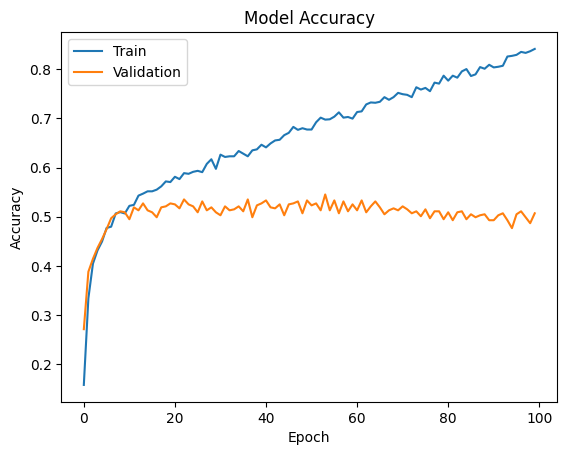

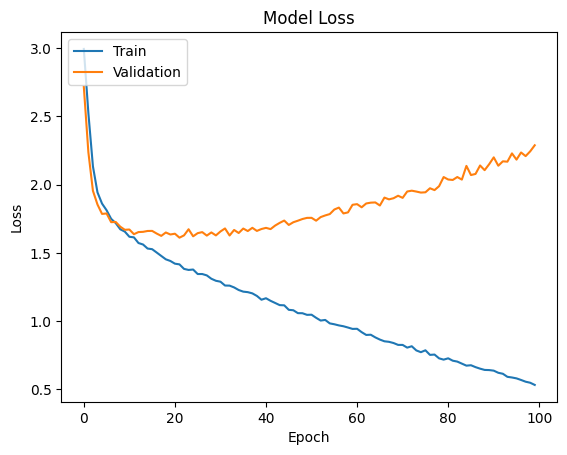

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


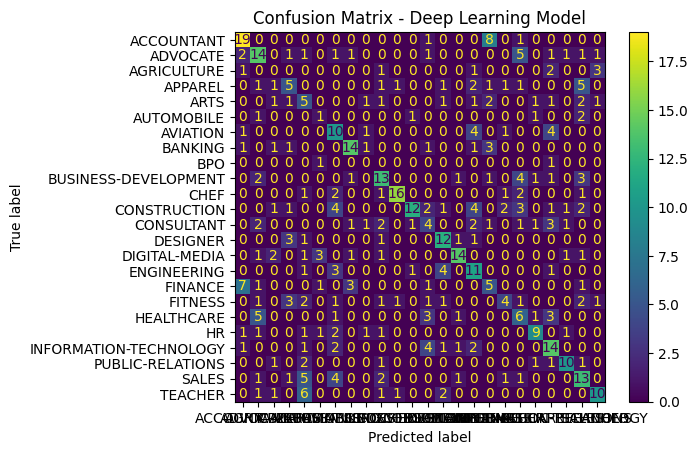

              precision    recall  f1-score   support

           0       0.58      0.66      0.61        29
           1       0.45      0.47      0.46        30
           2       0.00      0.00      0.00         8
           3       0.31      0.25      0.28        20
           4       0.19      0.28      0.22        18
           5       0.14      0.17      0.15         6
           6       0.33      0.48      0.39        21
           7       0.67      0.61      0.64        23
           8       0.00      0.00      0.00         2
           9       0.48      0.48      0.48        27
          10       0.84      0.67      0.74        24
          11       0.80      0.35      0.49        34
          12       0.22      0.20      0.21        20
          13       0.52      0.63      0.57        19
          14       0.74      0.56      0.64        25
          15       0.38      0.52      0.44        21
          16       0.24      0.26      0.25        19
          17       0.40    

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(unique_categories), activation='softmax'))  # Output layer with number of categories

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot()
plt.title('Confusion Matrix - Deep Learning Model')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [53]:
# prompt: save the model

# Save the model
model.save('/content/drive/MyDrive/BA/dataset/Resume/dense.h5')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 6, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.0640 - loss: 3.1217 - val_accuracy: 0.1529 - val_loss: 2.8683
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2001 - loss: 2.7915 - val_accuracy: 0.2797 - val_loss: 2.5829
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2874 - loss: 2.5482 - val_accuracy: 0.3280 - val_loss: 2.3744
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3410 - loss: 2.3136 - val_accuracy: 0.3501 - val_loss: 2.2823
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3620 - loss: 2.2574 - val_accuracy: 0.3642 - val_loss: 2.1167
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3875 - loss: 2.1547 - val_accuracy: 0.4064 - val_loss: 2.0216
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3936 - loss: 2.0664 - val_accuracy: 0.4185 - val_loss: 1.9751
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4212 - loss: 2.0132 - val_accuracy: 0.4286 - val_l

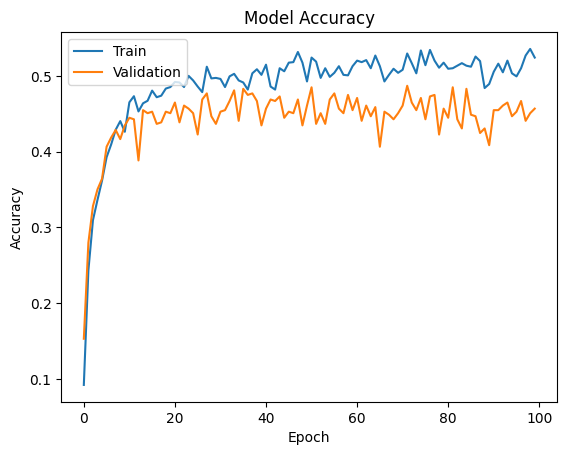

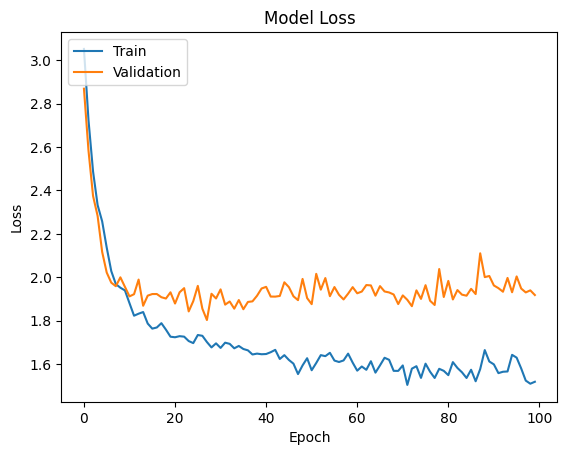

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 6, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


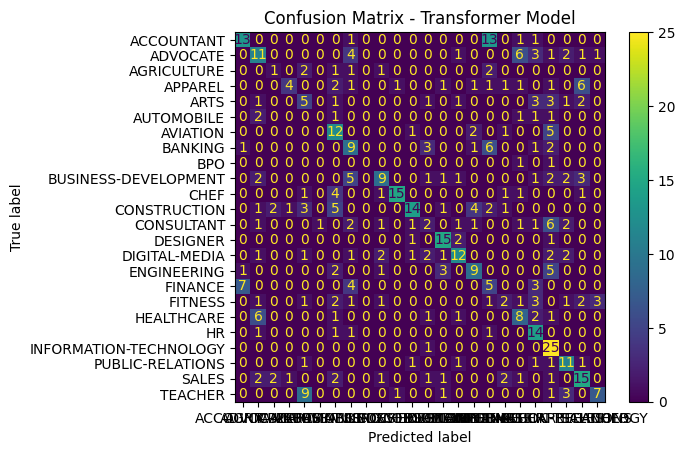

              precision    recall  f1-score   support

           0       0.59      0.45      0.51        29
           1       0.38      0.37      0.37        30
           2       0.20      0.12      0.15         8
           3       0.67      0.20      0.31        20
           4       0.22      0.28      0.24        18
           5       0.00      0.00      0.00         6
           6       0.35      0.57      0.44        21
           7       0.30      0.39      0.34        23
           8       0.00      0.00      0.00         2
           9       0.53      0.33      0.41        27
          10       0.88      0.62      0.73        24
          11       0.74      0.41      0.53        34
          12       0.17      0.10      0.12        20
          13       0.62      0.79      0.70        19
          14       0.60      0.48      0.53        25
          15       0.50      0.43      0.46        21
          16       0.16      0.26      0.20        19
          17       0.25    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
# Assuming 'word2vec_embedding' is a NumPy array
df['word2vec_embedding'] = df['word2vec_embedding'].apply(lambda x: np.array(x))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['word2vec_embedding'].tolist(),
    df['Category_encoded'],
    test_size=0.2,
    random_state=42
)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.25,
    random_state=42
)

# Convert to NumPy arrays for deep learning
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)


# Reshape the input data for the transformer model
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the transformer model with your input shape
from tensorflow.keras.layers import Input, MultiHeadAttention, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Model

def build_transformer_model(max_text_length):
    inputs = Input(shape=(1, 300))  # Input shape based on your word2vec embedding size
    x = MultiHeadAttention(num_heads=6, key_dim=300)(inputs, inputs)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = Bidirectional(LSTM(32))(x)
    x = Dense(16, activation='relu')(x)
    outputs = Dense(len(unique_categories), activation='softmax')(x)  # Output layer with number of categories
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the model
model = build_transformer_model(X_train.shape[1])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot()
plt.title('Confusion Matrix - Transformer Model')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.1161 - loss: 3.6886 - val_accuracy: 0.0101 - val_loss: 3.1769
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2284 - loss: 2.7198 - val_accuracy: 0.0101 - val_loss: 3.3550
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2558 - loss: 2.5685 - val_accuracy: 0.0101 - val_loss: 3.4386
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2705 - loss: 2.3940 - val_accuracy: 0.0101 - val_loss: 3.5587
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2646 - loss: 2.4367 - val_accuracy: 0.0161 - val_loss: 3.5332
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2910 - loss: 2.3254 - val_accuracy: 0.0302 - val_loss: 3.5139
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3184 - loss: 2.3250 - val_accuracy: 0.0885 - val_loss: 3.2265
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3216 - loss: 2.2638 - val_accuracy: 0.1690 -

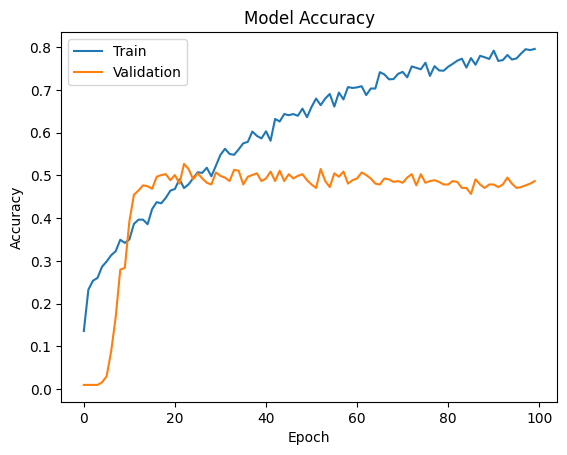

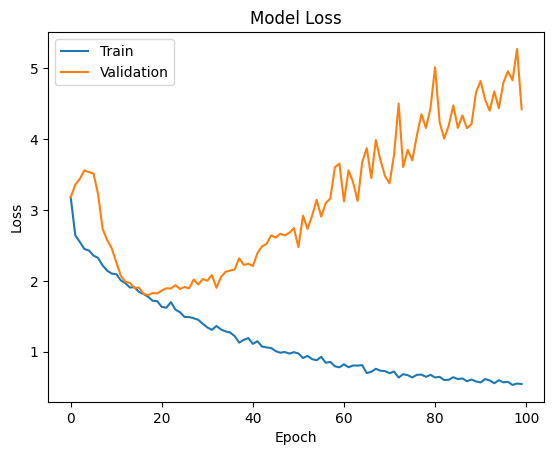

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


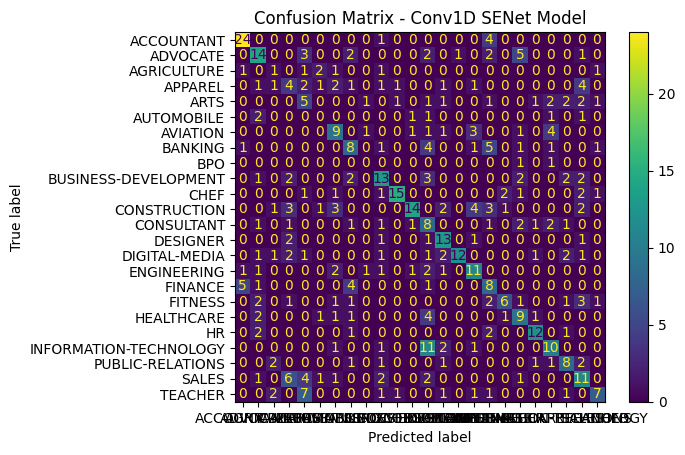

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.48      0.47      0.47        30
           2       0.12      0.12      0.12         8
           3       0.19      0.20      0.20        20
           4       0.21      0.28      0.24        18
           5       0.00      0.00      0.00         6
           6       0.41      0.43      0.42        21
           7       0.36      0.35      0.36        23
           8       0.00      0.00      0.00         2
           9       0.48      0.48      0.48        27
          10       0.83      0.62      0.71        24
          11       0.78      0.41      0.54        34
          12       0.19      0.40      0.26        20
          13       0.52      0.68      0.59        19
          14       0.92      0.48      0.63        25
          15       0.48      0.52      0.50        21
          16       0.28      0.42      0.33        19
          17       0.60    

In [55]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Add, Activation, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Add, Activation, GlobalAveragePooling1D, Reshape, Multiply

# Define the SENet block
def se_block(input_tensor, ratio=16):
    num_filters = input_tensor.shape[-1]
    se_shape = (1, 1, num_filters)

    # Squeeze
    se = GlobalAveragePooling1D()(input_tensor)
    se = Reshape(se_shape)(se)

    # Excitation
    se = Dense(num_filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(num_filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    # Apply the attention weights
    x = Multiply()([input_tensor, se])
    return x

# Define the model
def build_conv1d_senet_model(input_shape):
    inputs = Input(shape=input_shape)

    # Conv1D layers
    x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)

    # SENet block
    x = se_block(x)

    # Flatten and dense layers
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(len(unique_categories), activation='softmax')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Reshape the input data for the Conv1D model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[1])  # Reshape to (samples, features, 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[2], X_val.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[1])

# Build the model - adjust the input shape accordingly
model = build_conv1d_senet_model((X_train.shape[1], X_train.shape[2]))  # Input shape is now (features, 1)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot()
plt.title('Confusion Matrix - Conv1D SENet Model')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [56]:
model.save('/content/drive/MyDrive/BA/dataset/Resume/SE_NET.h5')


In [57]:
# prompt: get current file path

import os
current_file_path = os.getcwd()
print(current_file_path)


/content
